<a href="https://colab.research.google.com/github/guebin/IP2023WIN/blob/main/posts/Day2/06_Functions, ControlFlow/2023-01-31-Lesson11.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# ref

<https://guebin.github.io/DV2022/posts/2022-10-12-6wk-12.html>

# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# map ($\star$)

`-` 개념: $\text{map}\left(f,[x_1,x_2,\dots,x_n] \right)=\left[f(x_1),f(x_2),\dots,f(x_n) \right] $

`-` 예제1: 

In [166]:
x = [1,2,3] 
f = lambda x: x+1 
y = list(map(f,x))

(다른구현1)

In [136]:
list(map(lambda x: x+1,[1,2,3]))

[2, 3, 4]

(다른구현2)

In [176]:
f = lambda x: x+1 
[f(xi) for xi in [1,2,3]]

[2, 3, 4]

(다른구현3)

In [140]:
[(lambda x: x+1)(xi) for xi in [1,2,3]]

[2, 3, 4]

(다른구현4)--최악

In [178]:
y = [] 
x = [1,2,3] 
f = lambda x: x+1 
for xi in x:
    y.append(f(xi))

In [179]:
y

[2, 3, 4]

(다른구현5)--더 최악

In [143]:
y = [] 
x = [1,2,3] 
f = lambda x: x+1 
for i in range(len(x)):
    y.append(f(x[i]))

In [144]:
y

[2, 3, 4]

**Quiz**

$x=[1,2,3,4,5]$에 대하여 $x^2$을 수행하는 함수를 구현하라. 

`-` 예제2: 문자열을 입력으로 받고 대문자이면 True, 소문자이면 False 
```
입력: A,B,C,a,b,c
출력: T,T,T,F,F,F
```

In [210]:
x= list('ABCabc')
# x = ['A','B','C','a','b','c']
f = lambda s: s.isupper()
y = list(map(f,x))

In [211]:
x,y

(['A', 'B', 'C', 'a', 'b', 'c'], [True, True, True, False, False, False])

`-` 예제3: 두개의 입력을 받는 함수 (map을 이용하는 것이 리스트 컴프리헨션보다 조금 편한것 같다) 

In [268]:
list(map(lambda x,y: x+y, [1,2,3],[-1,-2,-3]))

[0, 0, 0]

(다른구현)-- 리스트컴프리헨션 

In [269]:
f = lambda x,y: x+y 
[f(x,y) for x,y in zip([1,2,3],[-1,-2,-3])] 

[0, 0, 0]

**quiz**

In [216]:
t=np.linspace(-3.14,3.14,100)
x=np.sin(t)
y=np.cos(t)

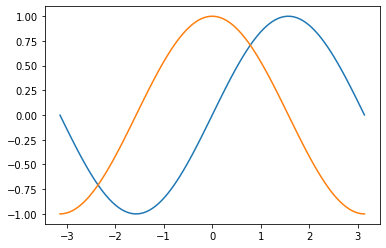

In [218]:
plt.plot(t,x)
plt.plot(t,y)

$f(x,y) = \max(x,y)$ 를 구현하여 ${\bf x}$,${\bf y}$ 각 원소에 적용하고 결과를 시각화 하라. 

In [231]:
f = (lambda x,y: max(x,y))
f(3,4)

4

In [236]:
z= list(map(f,x,y))

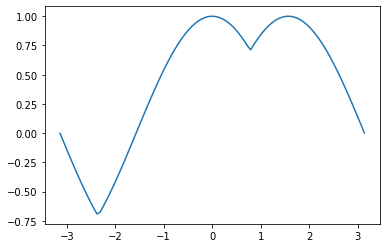

In [238]:
plt.plot(t,z)

`-` 예제4: map은 "하나의 함수에 다양한 입력"을 적용하는 경우에만 사용가능, 리스트컴프리헨션은 "다양한 함수에 다양한 입력" 지원 

In [239]:
flst = [lambda x: x+1, lambda x: x+2, lambda x:x+3] 

map으로 구현시도 $\to$ 실패 

In [259]:
list(map(flst,[-1,-2,-3])) # 결과가 0,0,0

TypeError: 'list' object is not callable

리스트컴프리헨션으로 구현시도 $\to$ 성공 

In [272]:
[f(x) for f,x in zip(flst,[-1,-2,-3])]

[0, 0, 0]

`-` 종합: map과 리스트컴프리헨션과 비교

- map은 for문을 위한 $i$등의 인덱스를 쓰지 않지만 리스트컴프리헨션은 필요함 
- map은 좀더 리스트컴프리헨션보다 제약적으로 사용할 수 밖에 없음. 

# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Quiz

다음과 같은 데이터프레임을 불러온 뒤 물음에 답하라 

In [518]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/_notebooks/dv2022.csv')
df

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20
3,55,35,35,5
4,80,60,55,70
...,...,...,...,...
195,55,70,40,95
196,65,85,25,85
197,85,85,100,10
198,80,65,35,60


`(1)` 기말고사 성적이 중간고사 성적보다 향상된 학생들을 출력하라. 즉 mid < fin 인 학생들을 출력하라. (다양한 방법으로 연습할 것, 제출은 한 가지 방법으로 구현해도 감점없음) 

In [521]:
# 구현결과가 아래와 같아야 한다. 

,att,rep,mid,fin
0,65,45,0,10
2,65,85,15,20
4,80,60,55,70
5,75,40,75,85
6,65,70,60,75
...,...,...,...,...
194,65,40,65,70
195,55,70,40,95
196,65,85,25,85
198,80,65,35,60


`(2)` 기말고사 성적이 중간고사 성적보다 향상된 학생들의 출석과 레포트 점수를 출력하라. 

In [523]:
# 구현결과가 아래와 같아야 한다. 

,att,rep
0,65,45
2,65,85
4,80,60
5,75,40
6,65,70
...,...,...
194,65,40
195,55,70
196,65,85
198,80,65


In [64]:
df = pd.DataFrame({'a':[1,2,3,4],'b':[2,3,4,5],'c':[3,4,5,6],'d':[4,5,6,7]})
df

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6
3,4,5,6,7


## `2`.

아래의 결과를 관찰하고 drop의 기능을 유추하라. 

(예시1)

In [65]:
df.drop(columns='a')

,b,c,d
0,2,3,4
1,3,4,5
2,4,5,6
3,5,6,7


(예시2)

In [66]:
df.drop(columns=['a','b'])

,c,d
0,3,4
1,4,5
2,5,6
3,6,7


(예시3)

In [67]:
df.drop(index=0)

,a,b,c,d
1,2,3,4,5
2,3,4,5,6
3,4,5,6,7


(예시4)

In [71]:
df.drop(index=range(2,4))

,a,b,c,d
0,1,2,3,4
1,2,3,4,5


문제: `df` 에서 a,c열을 삭제하고 첫행을 삭제하라. 

In [78]:
#출력결과는 아래와 같아야 한다. 

,b,d
1,3,5
2,4,6
3,5,7
